<a href="https://colab.research.google.com/github/girishkarhana/50_startups.csv-analysis-with-pandas/blob/main/50_startups_csv_analysis_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

<ipython-input-1-8eefc4b59ca6>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
dataset=pd.read_csv('50_Startups.csv')

In [3]:
len(dataset)

50

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.shape

(50, 5)

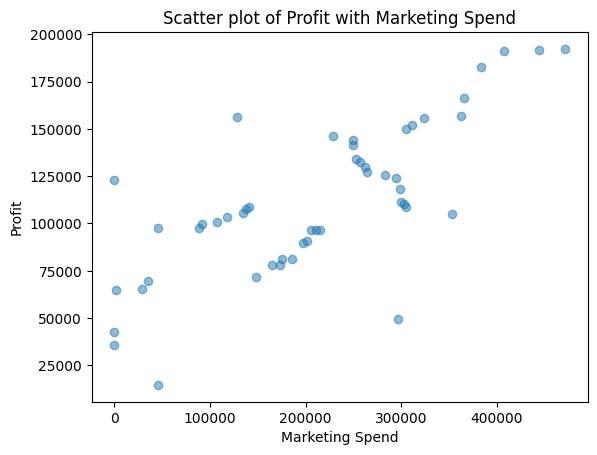

In [6]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

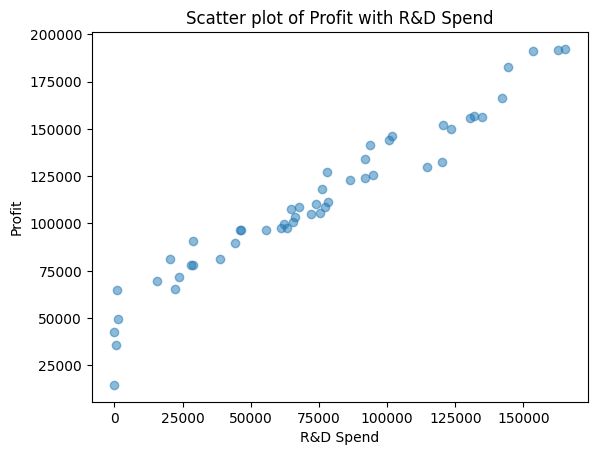

In [8]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

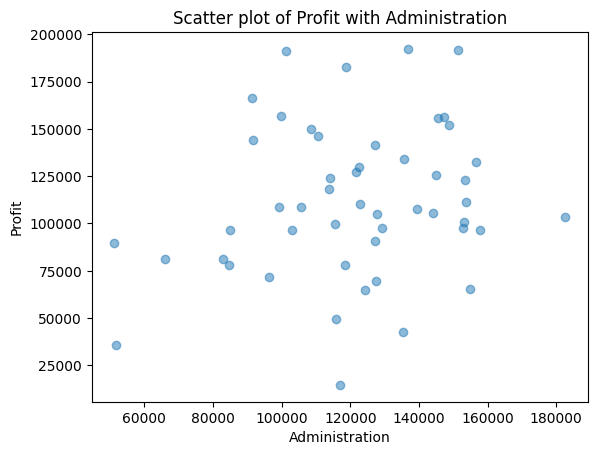

In [9]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

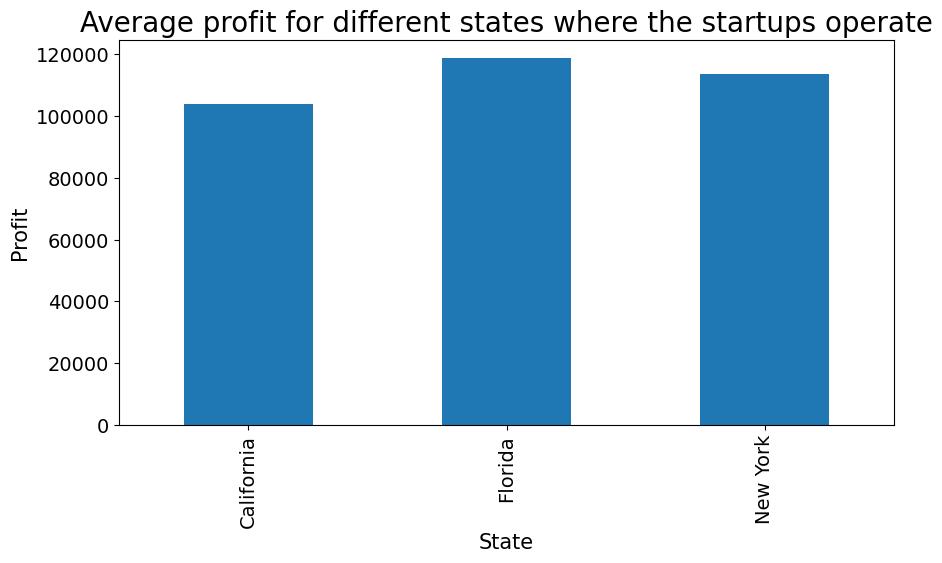

In [11]:
ax=dataset.groupby(['State'])['Profit'].mean().plot.bar(figsize=(10,5),fontsize=14)
ax.set_title("Average profit for different states where the startups operate", fontsize=20)
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("Profit", fontsize=15)

In [12]:
dataset.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


In [13]:
dataset['NewYork_State']=np.where(dataset['State']=='New York', 1, 0)
dataset['California_State']=np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State']=np.where(dataset['State']=='Florida', 1, 0)
dataset.drop(columns=['State'],axis=1,inplace=True)

In [17]:
dependent_variable='Profit'

In [18]:
independent_variables=list(set(dataset.columns.tolist())-{dependent_variable})

In [19]:
independent_variables

['NewYork_State',
 'R&D Spend',
 'California_State',
 'Administration',
 'Florida_State',
 'Marketing Spend']

In [20]:
x=dataset[independent_variables].values
y=dataset[dependent_variable].values
dataset[independent_variables]

,NewYork_State,R&D Spend,California_State,Administration,Florida_State,Marketing Spend
0,1,165349.20,0,136897.80,0,471784.10
1,0,162597.70,1,151377.59,0,443898.53
2,0,153441.51,0,101145.55,1,407934.54
3,1,144372.41,0,118671.85,0,383199.62
4,0,142107.34,0,91391.77,1,366168.42
5,1,131876.90,0,99814.71,0,362861.36
6,0,134615.46,1,147198.87,0,127716.82
7,0,130298.13,0,145530.06,1,323876.68
8,1,120542.52,0,148718.95,0,311613.29
9,0,123334.88,1,108679.17,0,304981.62


In [22]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
x_train[0:10]

array([[0.0000000e+00, 5.5493950e+04, 0.0000000e+00, 1.0305749e+05,
        1.0000000e+00, 2.1463481e+05],
       [1.0000000e+00, 4.6014020e+04, 0.0000000e+00, 8.5047440e+04,
        0.0000000e+00, 2.0551764e+05],
       [0.0000000e+00, 7.5328870e+04, 0.0000000e+00, 1.4413598e+05,
        1.0000000e+00, 1.3405007e+05],
       [0.0000000e+00, 4.6426070e+04, 1.0000000e+00, 1.5769392e+05,
        0.0000000e+00, 2.1079767e+05],
       [0.0000000e+00, 9.1749160e+04, 0.0000000e+00, 1.1417579e+05,
        1.0000000e+00, 2.9491957e+05],
       [0.0000000e+00, 1.3029813e+05, 0.0000000e+00, 1.4553006e+05,
        1.0000000e+00, 3.2387668e+05],
       [0.0000000e+00, 1.1994324e+05, 0.0000000e+00, 1.5654742e+05,
        1.0000000e+00, 2.5651292e+05],
       [1.0000000e+00, 1.0002300e+03, 0.0000000e+00, 1.2415304e+05,
        0.0000000e+00, 1.9039300e+03],
       [1.0000000e+00, 5.4205000e+02, 0.0000000e+00, 5.1743150e+04,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 6.5605480e+04,

In [23]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train[0:10]

array([[0.        , 0.33561668, 0.        , 0.48655174, 1.        ,
        0.45494286],
       [1.        , 0.2782839 , 0.        , 0.3173015 , 0.        ,
        0.43561799],
       [0.        , 0.45557444, 0.        , 0.87258866, 1.        ,
        0.28413435],
       [0.        , 0.2807759 , 1.        , 1.        , 0.        ,
        0.44680961],
       [0.        , 0.55488118, 0.        , 0.59103645, 1.        ,
        0.62511553],
       [0.        , 0.7880179 , 0.        , 0.88568959, 1.        ,
        0.68649342],
       [0.        , 0.72539353, 0.        , 0.98922572, 1.        ,
        0.54370828],
       [1.        , 0.0060492 , 0.        , 0.6847981 , 0.        ,
        0.0040356 ],
       [1.        , 0.00327821, 0.        , 0.00432296, 0.        ,
        0.        ],
       [1.        , 0.39676926, 0.        , 0.95618996, 0.        ,
        0.22709197]])

In [25]:
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [26]:
regressor.intercept_

44153.954667848564

In [27]:
regressor.coef_

array([ 7.86007422e+02,  1.27892182e+05,  8.66383692e+01,  3.49927567e+03,
       -8.72645791e+02,  1.72720281e+04])

In [29]:
y_pred_train=regressor.predict(x_train)
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [30]:
y_pred=regressor.predict(x_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [31]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [32]:
mean_squared_error(y_test, y_pred)

83502864.03257719

In [33]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [34]:
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794935

In [35]:
r2_score(y_train, y_pred_train)

0.9501847627493607